# Full pipeline

In [1]:
import logging

In [2]:
from comms_helper.data.scraping import scrape_tweets_to_df,scrape_tweets,scraped_tweets_to_df

## Params

In [3]:
RANDOM_STATE = 42

In [4]:
SEARCH_TERM = "Robert Hazell"

TESTING=False

N_MAX = 20 if TESTING else 5000

## Logger

In [5]:
logger = logging.getLogger()
handler = logging.StreamHandler()
formatter = logging.Formatter("%(asctime)s [%(name)s] %(levelname)-8s %(message)s")
handler.setFormatter(formatter)
logger.addHandler(handler)
logger.setLevel(logging.INFO)

In [6]:
logging.getLogger("snscrape").setLevel(logging.WARNING) # mute noisy logging from snscrape

## Scrape data

In [7]:
tweets_lst = scrape_tweets(SEARCH_TERM,N_MAX)

2022-05-23 21:13:08,940 [root] INFO     [comms_helper.scraping] Scraping the first 5000 tweets for search 'Robert Hazell'...
 24%|███████████████████████▌                                                                          | 1205/5000 [00:40<02:08, 29.54it/s]


In [8]:
df = scraped_tweets_to_df(tweets_lst)

/usr/local/lib/python3.8/site-packages/comms_helper/data/scraping.py:44: FutureWarning: username is deprecated, use user.username instead
  tweet_dict["username"] = [tweet.username for tweet in tweets_list]


In [9]:
df.head()

,url,date,content,id,username
0,https://twitter.com/BYMYong/status/15276305194...,2022-05-20 12:41:12+00:00,"@StephenRW01 Yes, exactly! Robert Hazell and I...",1527630519470637056,BYMYong
1,https://twitter.com/BYMYong/status/15268643192...,2022-05-18 09:56:36+00:00,Great thread. From a book Robert Hazell and I ...,1526864319299960832,BYMYong
2,https://twitter.com/ConUnit_UCL/status/1526609...,2022-05-17 17:04:19+00:00,This seminar will look back on the constitutio...,1526609569983909890,ConUnit_UCL
3,https://twitter.com/ConUnit_UCL/status/1526180...,2022-05-16 12:39:26+00:00,⏰Time to take stock...\n\nJoin us tomorrow to ...,1526180521704935425,ConUnit_UCL
4,https://twitter.com/RobBurl/status/15240727736...,2022-05-10 17:03:59+00:00,Coming up at 6pm on @lbc Tonight with Andrew M...,1524072773643116545,RobBurl


In [13]:
df["date"].min()

Timestamp('2008-08-04 17:36:37+0000', tz='UTC')

## Visualise

In [10]:
import matplotlib.pyplot as plt

In [11]:

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

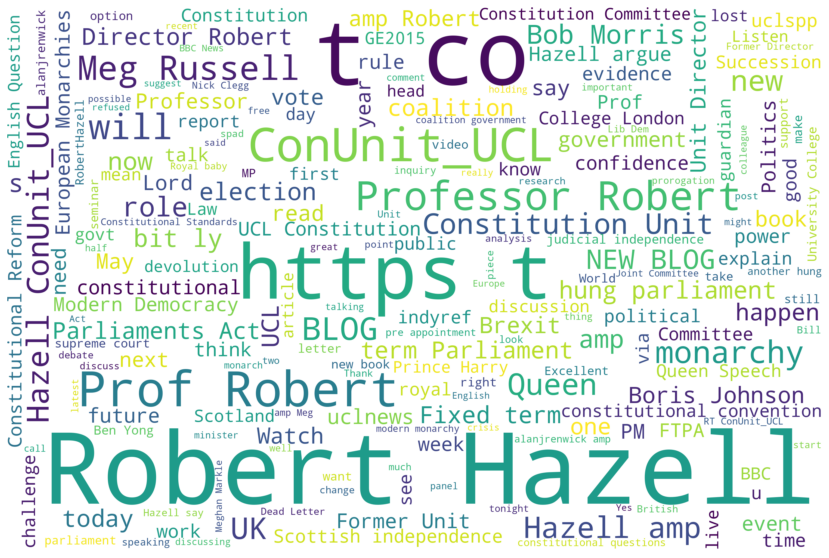

In [12]:
text = " ".join(i for i in df.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(        width=3000,
        height=2000,
        random_state=RANDOM_STATE,stopwords=stopwords, background_color="white").generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()